In [1]:
import numpy as np
import pandas as pd

In [2]:
elec = pd.read_csv("elec_load.csv")
elec.head(2)

YEAR  MONTH  DAY   X1HR   X2HR   X3HR   X4HR   X5HR   X6HR   X7HR  ...  \
0  2008      1    1  39638  37682  35801  34154  33068  32529  31982  ...   
1  2008      1    2  37425  35239  33568  32171  31616  31725  32575  ...   

   X15HR  X16HR  X17HR  X18HR  X19HR  X20HR  X21HR  X22HR  X23HR  X24HR  
0  28147  28313  28683  30921  32879  33038  34031  34684  37444  38160  
1  38213  38132  38399  39796  40810  39980  40084  39630  42008  42150  

[2 rows x 27 columns]

In [3]:
elec_melt = elec.melt(id_vars = elec.columns[:3])
elec_melt.head(2)

YEAR  MONTH  DAY variable  value
0  2008      1    1     X1HR  39638
1  2008      1    2     X1HR  37425

In [4]:
elec_melt["variable"].unique()

array(['X1HR', 'X2HR', 'X3HR', 'X4HR', 'X5HR', 'X6HR', 'X7HR', 'X8HR',
       'X9HR', 'X10HR', 'X11HR', 'X12HR', 'X13HR', 'X14HR', 'X15HR',
       'X16HR', 'X17HR', 'X18HR', 'X19HR', 'X20HR', 'X21HR', 'X22HR',
       'X23HR', 'X24HR'], dtype=object)

In [6]:
ser = pd.Series([43900, 44000])
ser_time = pd.to_datetime(ser, unit = "D", origin = pd.Timestamp("1900-01-01"))

In [7]:
ser_time.dt.dayofweek

0    3
1    5
dtype: int64

In [8]:
from scipy.stats.stats import pearsonr

In [10]:
df_corr = pd.DataFrame({"AA": [1, 4, 6, 8, 6, 9],
                        "BB": [2, 3, 8, 2, 4, 10]})
df_corr

AA  BB
0   1   2
1   4   3
2   6   8
3   8   2
4   6   4
5   9  10

In [11]:
pearsonr(df_corr["AA"], df_corr["BB"])

(0.5708277244359892, 0.23675889091766342)

In [13]:
hotel = pd.read_csv("hotel_booking_train_1m.zip")
hotel.head(1)

date_time  site_name  posa_continent  user_location_country  \
0  2014-07-07         11               3                    205   

   user_location_region  user_location_city  orig_destination_distance  \
0                   354               25315                   383.3362   

   user_id  is_mobile  is_package  ...     srch_ci     srch_co  \
0   163906          0           0  ...  2014-08-04  2014-08-08   

  srch_adults_cnt  srch_children_cnt  srch_rm_cnt  srch_destination_id  \
0               4                  0            2                11569   

   srch_destination_type_id  is_booking  cnt  hotel_country  
0                         1           0    1             50  

[1 rows x 21 columns]

### Q1. 국가 규모를 파악하기 위해서 국가별 도시의 개수를 파악하고 도시가 많은 순서대로 국가 3개를 차례대로 기술하시오.
(정답 예시: 23, 45, 67)

In [15]:
hotel.groupby(["user_location_country"])["user_location_city"].agg(lambda x: len(set(x))).reset_index()

user_location_country  user_location_city
0                        0                 205
1                        1                2123
2                        3                 734
3                        4                   1
4                        5                 263
..                     ...                 ...
225                    235                  15
226                    236                   1
227                    237                   1
228                    238                   3
229                    239                   3

[230 rows x 2 columns]

In [20]:
hotel["user_location_country"].unique().max()

239

In [21]:
hotel_c_0 = hotel.loc[hotel["user_location_country"] == 0, ]
len(hotel_c_0)

4667

In [22]:
len(hotel_c_0["user_location_city"].unique())

205

In [23]:
hotel_c_cnt = hotel.groupby(["user_location_country"])["user_location_city"].agg(lambda x: len(set(x))).reset_index()
hotel_c_cnt.head(3)

user_location_country  user_location_city
0                      0                 205
1                      1                2123
2                      3                 734

In [29]:
hotel_c_cnt.sort_values(by = "user_location_city", ascending = False).head(3)

user_location_country  user_location_city
64                     66                9515
44                     46                2160
67                     69                2135

In [31]:
hotel_c_cnt = hotel.groupby(["user_location_country"])["user_location_city"].nunique()
hotel_c_cnt.head(2)

user_location_country
0     205
1    2123
Name: user_location_city, dtype: int64

### Q2. 국가 관련 변수를 활용하여 국내여행과 국외여행을 구분하는 변수를 새로 생성하시오.

In [33]:
hotel["is_domestic"] = (hotel["user_location_country"] == hotel["hotel_country"]) + 0
hotel.head(2)

date_time  site_name  posa_continent  user_location_country  \
0  2014-07-07         11               3                    205   
1  2014-09-20          2               3                     66   

   user_location_region  user_location_city  orig_destination_distance  \
0                   354               25315                   383.3362   
1                   153               20706                  2297.5172   

   user_id  is_mobile  is_package  ...     srch_co srch_adults_cnt  \
0   163906          0           0  ...  2014-08-08               4   
1   201303          1           0  ...  2015-01-03               2   

  srch_children_cnt  srch_rm_cnt  srch_destination_id  \
0                 0            2                11569   
1                 0            1                19137   

   srch_destination_type_id  is_booking  cnt  hotel_country  is_domestic  
0                         1           0    1             50            0  
1                         5           0    1            128            0  

[2 rows x 22 columns]

In [35]:
hotel["is_domestic"].value_counts(normalize=True) * 100

0    99.8662
1     0.1338
Name: is_domestic, dtype: float64

### Q3. 검색일자부터 최초 숙박일까지 남은 일자를 계산하고, 그 값과 숙박일수간의 상관계수(피어슨 상관계수)를 계산하시오.
변수는 "date_time", "srch_ci", "srch_co" 를 사용하시오

In [44]:
# hotel["srch_ci"][:3] - hotel["date_time"][:3]
pd.to_datetime(hotel["srch_ci"][:3]) - pd.to_datetime(hotel["date_time"][:3])

0    28 days
1   103 days
2    38 days
dtype: timedelta64[ns]

In [ ]:
hotel["day_left"] = pd.to_datetime(hotel["srch_ci"]) - pd.to_datetime(hotel["date_time"])
hotel["nights"]   = pd.to_datetime(hotel["srch_co"]) - pd.to_datetime(hotel["srch_ci"])
hotel.head(1)

In [ ]:
hotel["nights"][:3].dt.days

In [53]:
hotel_notna = hotel.loc[hotel["day_left"].notna(), ]

In [54]:
from scipy.stats.stats import pearsonr
pearsonr(hotel_notna["day_left"].dt.days, hotel_notna["nights"].dt.days)

(0.22287625802700756, 0.0)

In [24]:
set([1, 1, 2, 3, 4, 4, 4])

{1, 2, 3, 4}

In [26]:
set([1, 1, 2, 3, 4, 4, 4])[0]

TypeError: 'set' object is not subscriptable

In [25]:
type(set([1, 1, 2, 3, 4, 4, 4]))

set

In [27]:
pd.Series([1, 1, 2, 3, 4, 4, 4]).unique()

array([1, 2, 3, 4], dtype=int64)

In [28]:
pd.Series([1, 1, 2, 3, 4, 4, 4]).unique()[0]

1

In [56]:
from scipy.stats import chi2_contingency
df = pd.read_csv("traffic_accident.txt", sep = "\t")
df.head(2)

seq sex serious_yn  age
0    1   M          N    3
1    2   M          N    6

In [57]:
tab = pd.crosstab(df["serious_yn"], df["sex"])
tab

sex           F    M
serious_yn          
N           296  670
Y            21   80

In [58]:
chi2_contingency(tab, correction=True)

(3.7895026717172966,
 0.051574970410524265,
 1,
 array([[286.99343955, 679.00656045],
        [ 30.00656045,  70.99343955]]))

In [59]:
stat, p, dof, exp = chi2_contingency(tab, correction = True)
print("stat: " + str(round(stat, 4)))
print("p-value: " + str(round(p, 4)))

stat: 3.7895
p-value: 0.0516


운전자의 성별과 교통사고 심각도간 독립성 검정 결과 검정통계량 $\chi^2$이 3.7895로 계산되었고, 이 값을 토대로 p-value는 0.0516으로 계산되었다. 이 결과는 유의수준 5%(0.05)를 기준으로 **두 변수간에 연관이 없다라고 하는** 귀무가설($H_0$)를 기각하지 못한다. 즉, 운전자의 성별과 교통사고 심각도간에 관련이 없다(또는 상호 독립).

In [60]:
tab = pd.crosstab(df["serious_yn"], df["age"])
stat, p, dof, exp = chi2_contingency(tab, correction = True)
print("stat: " + str(round(stat, 4)))
print("p-value: " + str(round(p, 4)))

stat: 9.4105
p-value: 0.0516


운전자의 나이와 교통사고 심각도간 독립성 검정 결과 검정통계량 $\chi^2$이 9.4105로 계산되었고, 이 값을 토대로 p-value는 0.0516으로 계산되었다. 이 결과는 유의수준 5%(0.05)를 기준으로 **두 변수간에 연관이 없다라고 하는** 귀무가설($H_0$)를 기각하지 못한다. 즉, 운전자의 나이와 교통사고 심각도간에 관련이 없다(또는 상호 독립).

독립성 검정. 명목형과 명목형 변수간에 실시하는 검정

In [2]:
from scipy.stats import ttest_1samp

In [3]:
df = pd.read_excel("iris_xlsx.xlsx")
df.head(2)

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa

In [6]:
stat, p = ttest_1samp(df["Sepal.Length"], popmean = 4)
print(stat) # 검정통계량 t
print(p) # p-value

27.263680640799215
8.764592435410748e-60


In [8]:
df["Sepal.Length"].mean()

5.843333333333335

In [12]:
stat, p = ttest_1samp(df["Sepal.Length"], popmean = 5.75)
print(stat) # 검정통계량 t
print(p) # p-value

1.3804395261164213
0.16951878249006963


In [13]:
from scipy import stats

In [14]:
stats.ttest_1samp(pd.Series([1, 4, 6, 8, 10]), popmean= 5)

Ttest_1sampResult(statistic=0.5121475197315838, pvalue=0.635528702976326)

In [22]:
from scipy.stats import f_oneway
df = pd.read_excel("iris_xlsx.xlsx")
stat, p = f_oneway(df["Sepal.Length"],
                   df["Sepal.Width"],
                   df["Petal.Length"])
print(stat)
print(p)

236.75163298404746
7.657188374182084e-71


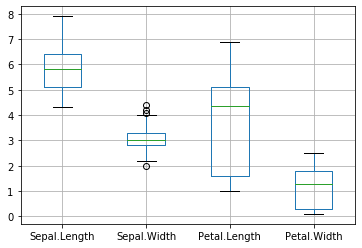

In [23]:
df.boxplot()

In [26]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [27]:
df = pd.read_csv("diamonds.csv")
df.head(2)

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31

In [30]:
formula = "price ~ C(cut)"
lm = ols(formula, df).fit()
anova_lm(lm)

df        sum_sq       mean_sq           F         PR(>F)
cut           4.0  1.104175e+10  2.760436e+09  175.688717  8.428307e-150
Residual  53935.0  8.474314e+11  1.571209e+07         NaN            NaN

* **F**: 분산분석의 검정통계량 F
* **PR(>F)**: 현재 계산된 검정통계량 F 보다 큰 검정통계량이 계산될 확률(즉, p-value)

In [35]:
bike = pd.read_csv("bike.csv")
formula = "casual ~ C(season)"
lm = ols(formula, bike).fit()
anova_lm(lm)

df        sum_sq        mean_sq           F         PR(>F)
C(season)      3.0  2.357570e+06  785856.669382  344.660562  7.937799e-214
Residual   10882.0  2.481193e+07    2280.088747         NaN            NaN

In [36]:
bike = pd.read_csv("bike.csv")
formula = "casual ~ season"
lm = ols(formula, bike).fit()
anova_lm(lm)

df        sum_sq        mean_sq           F        PR(>F)
season        1.0  2.543642e+05  254364.153634  102.860335  4.600135e-24
Residual  10884.0  2.691513e+07    2472.908085         NaN           NaN

In [39]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
posthoc = pairwise_tukeyhsd(df["price"], df["cut"])
print(posthoc)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
 group1   group2   meandiff p-adj    lower      upper   reject
--------------------------------------------------------------
   Fair      Good -429.8933 0.0015  -740.4567 -119.3299   True
   Fair     Ideal -901.2158  0.001 -1180.5785 -621.8531   True
   Fair   Premium  225.4999  0.195   -59.2739  510.2738  False
   Fair Very Good -376.9979 0.0031  -663.8694  -90.1263   True
   Good     Ideal -471.3225  0.001   -642.367 -300.2779   True
   Good   Premium  655.3933  0.001   475.6466  835.1399   True
   Good Very Good   52.8954    0.9  -130.1565  235.9474  False
  Ideal   Premium 1126.7157  0.001  1008.8058 1244.6257   True
  Ideal Very Good  524.2179  0.001   401.3281  647.1078   True
Premium Very Good -602.4978  0.001  -737.2366 -467.7591   True
--------------------------------------------------------------
